### Explanation of Code: Image Loading, Prediction, and Visualization for Bird Classification Model

This code defines functions to load, preprocess, predict, and visualize images for a bird classification model. It also includes an example loop that randomly selects images from a test dataset and displays the model's predictions.

---

#### 1. Loading and Preprocessing an Image

- **`load_and_preprocess_image(image_path, transform)`**:
  - Loads an image from the given file path.
  - Converts the image to **RGB** format to ensure compatibility with the model.
  - Applies the specified **transformations** (e.g., resizing, normalization).
  - **Returns** the original image and a preprocessed tensor with an added batch dimension, ready for model input.

#### 2. Making Predictions on an Image

- **`predict_image(model, image_path, transform, device)`**:
  - Loads and preprocesses an image using `load_and_preprocess_image`.
  - Sets the model to **evaluation mode** to disable layers like dropout and batch normalization.
  - Disables gradient calculation (`torch.no_grad()`) to optimize memory usage and speed during inference.
  - Moves the preprocessed image tensor to the specified **device** (CPU or GPU).
  - Passes the image through the model to get **class probabilities** by applying a **softmax** function to the output.
  - **Returns** the original image and a flattened array of probabilities for each class.

#### 3. Visualizing Predictions

- **`visualize_predictions(image, probabilities, class_names, top_k=5)`**:
  - Displays the original image along with a **bar chart** of the top-k class predictions.
  - Retrieves indices of the top-k probabilities and maps them to their respective class names.
  - Creates a plot with:
    - The **original image** on the left.
    - A **horizontal bar chart** of the top-k class probabilities on the right.
  - **Uses `plt.show()`** to display the combined image and bar chart, with the highest probability class at the top of the chart.

#### 4. Selecting a Random Image from a Folder

- **`get_random_image_from_folder(folder_path)`**:
  - Selects a random image from a folder structure organized by class.
  - Lists all subfolders in the specified root folder, where each subfolder corresponds to a class.
  - Randomly selects a **class folder** and then a **random image** within that folder.
  - **Returns** the file path to the selected image and its actual class label.

#### 5. Example Usage: Predicting and Visualizing Random Images

- **`for` loop to predict and visualize 10 random images**:
  - **`test_folder_path`**: Specifies the path to the test dataset, where images are organized by class.
  - **`transform`**: Defines transformations (resizing, tensor conversion, normalization) to preprocess images.
  - **`class_names`**: Uses `full_train_dataset.classes` to get the list of class names corresponding to the model’s output.
  
- **Loop Logic**:
  - For each iteration:
    - Selects a random image from the test folder using `get_random_image_from_folder`.
    - Makes a prediction using `predict_image`, returning the original image and class probabilities.
    - Calls `visualize_predictions` to display the image and top-k predictions.
    - Prints the **actual and predicted class** for each image to provide feedback on model performance.

---

### Summary

This code provides a complete pipeline for evaluating a bird classification model:

1. **Image Loading and Preprocessing**: Ensures images are in the correct format and scaled for the model.
2. **Prediction**: Uses the model to predict class probabilities for each input image.
3. **Visualization**: Displays the original image alongside a bar chart of the top-k predictions.
4. **Random Image Selection**: Selects images randomly from a folder structure to test model performance on diverse classes.
5. **Example Usage**: Predicts and visualizes 10 random test images, printing both the actual and predicted class labels.

This setup allows for efficient and informative testing of the bird classification model, showcasing its accuracy and confidence across different classes.
## Bird Classification Model using PyTorch

### 1. Setting Up the Environment
- Install PyTorch and required libraries, such as `torchvision`.
- Set up a project directory and organize data into folders for training, validation, and testing images if not already structured.

### 2. Data Preparation
- **Organize Dataset**: Ensure dataset is structured in a way where each class has its own subfolder (e.g., `train/eagle`, `train/sparrow`).
- **Define Transforms**: Set up data augmentations and pre-processing steps, like resizing, normalization, and random rotations.
- **Create DataLoaders**: Use `torchvision.datasets.ImageFolder` to load images, apply transformations, and wrap them in `DataLoader` for batch processing.

### 3. Define the Model
- Choose a CNN model architecture, such as ResNet, VGG, or a custom CNN.
- Modify the output layer of the model to match the number of bird classes in your dataset.

### 4. Set Up Training Components
- Define a loss function, typically Cross Entropy Loss for classification tasks.
- Choose an optimizer, such as SGD or Adam, and set an initial learning rate.
- Optionally, set up a learning rate scheduler to adjust the learning rate during training for improved convergence.

### 5. Training Loop
- Create a loop to train the model over multiple epochs, with each epoch consisting of:
  - Iterating through training data, computing the loss, and updating weights.
  - Tracking training accuracy and loss for each epoch.
- Add a validation step to monitor performance on the test dataset and track potential overfitting or underfitting.

### 6. Evaluate the Model
- After training, evaluate the model’s performance on the test set.
- Calculate metrics such as accuracy, and optionally precision, recall, and F1-score if the dataset is imbalanced.
- Save the trained model for future use.

### 7. Fine-Tuning and Optimization
- Experiment with strategies to improve model performance if results are unsatisfactory:
  - **Data Augmentation**: Enhance augmentations to reduce overfitting.
  - **Hyperparameter Tuning**: Adjust parameters like learning rate, batch size, etc.
  - **Model Architecture**: Test different architectures or deeper versions of the model.
  - **Learning Rate Scheduler**: Use advanced scheduling techniques to improve training.

### 8. Saving and Loading the Model
- Save the model weights and architecture for later use or transfer learning.
- Set up a simple method for reloading the model for further evaluation or continued training.

### 9. Deploying the Model
- Convert the model to a suitable deployment format, such as `torchscript`, for use in applications or to serve with a REST API.

### 10. Inference on New Data
- Create an inference pipeline to preprocess new images, load the trained model, and make predictions.
- Map predicted class indices back to class labels for user-friendly results.

In [1]:
# PyTorch core libraries for neural network building, optimization, and utilities
import torch                            # Main PyTorch library for tensor operations
import torch.nn as nn                   # Neural network module for layers and loss functions
import torch.optim as optim             # Optimization module with optimizers like SGD, Adam
import torch.nn.functional as F         # Functional API for operations like softmax

# TorchVision library for computer vision utilities, models, datasets, and transformations
from torchvision import datasets, transforms  # Dataset handling, pre-trained models, and data transforms
from torchvision.models import resnet152, ResNet152_Weights  # Specific imports for ResNet-152 model and weights

# PyTorch utilities for data loading and dataset management
from torch.utils.data import DataLoader, random_split  # DataLoader for batching and random_split for dataset splitting

# PIL library for image processing
from PIL import Image                                  # Image module for handling image loading and conversion

# Additional libraries for supporting functionalities
import random                                          # Random choices for selecting images, shuffling data
import os                                              # OS operations, useful for file and directory management
from tqdm import tqdm                                  # Progress bar tracking, useful for tracking training and data loading progress

# Matplotlib for data visualization, commonly used for plotting training metrics
import matplotlib.pyplot as plt

In [2]:
# Set paths for training and testing data
train_path = "/kaggle/input/bird-species-classification/train_data/train_data"
test_path = "/kaggle/input/bird-species-classification/test_data/test_data"

### Explanation of Image Transformations for Training and Validation

This setup includes two sets of image transformations: one designed for training with data augmentation and one for validation/testing without augmentation. Each set of transformations prepares images by resizing, normalizing, and modifying their properties to enhance model performance.

---

#### Training Transformations

The transformations applied during training focus on increasing the diversity of input images to improve the model’s robustness and generalization to new data. The transformations are:

- **Random Resizing and Cropping**: The image is randomly cropped and resized to a fixed size. This introduces variations in scale and object positioning, enabling the model to learn from different perspectives and sizes.

- **Horizontal Flipping**: The image is randomly flipped horizontally with a 50% probability. This allows the model to learn features that are invariant to left-right orientation, making it more flexible in recognizing objects in various orientations.

- **Rotation**: The image is randomly rotated by a small angle, providing the model with rotated examples. This helps the model become resilient to minor changes in object orientation.

- **Color Adjustments**: Brightness, contrast, saturation, and hue are adjusted randomly. These color adjustments simulate different lighting conditions, enabling the model to generalize across images taken in varied lighting and color environments.

- **Normalization**: After converting the image to a tensor, each pixel channel is standardized using a mean and standard deviation commonly used for pre-trained ImageNet models. This normalization aligns the pixel values with those of popular pre-trained models, ensuring better convergence and compatibility with existing architectures.

These training transformations introduce controlled randomness, creating varied inputs that help the model learn robust features.

---

#### Validation and Test Transformations

The transformations for validation and testing are simpler, focusing on ensuring consistent and standardized images without augmentation. The transformations applied are:

- **Resizing**: The image is resized to a fixed size to maintain uniform input dimensions across all validation and test samples. This helps ensure that each image evaluated by the model has the same size and content, promoting consistency.

- **Normalization**: As with the training transformations, each pixel channel is standardized using the same mean and standard deviation values. This ensures that validation and test data follow the same distribution as the training data, enabling fair and reliable evaluation of model performance.

---

### Summary

- The **training transformations** add controlled variations, such as resizing, flipping, rotation, and color changes, to enhance the model's ability to generalize across diverse data.
- The **validation and test transformations** maintain standardized resizing and normalization without random alterations, allowing for consistent and fair evaluation of the model.

This balanced approach of diverse training data and standardized validation/testing data helps the model learn effectively while providing reliable performance evaluation.


In [3]:
# Define transformations with data augmentation for training
train_transform = transforms.Compose([
    # Randomly crop the input image to a size of 224x224 pixels, and resize it back to 224x224
    # This helps introduce some scale variation to make the model more robust
    transforms.RandomResizedCrop(224),
    
    # Randomly flip the image horizontally with a 50% chance
    # This helps the model generalize better by learning features that are invariant to horizontal flipping
    transforms.RandomHorizontalFlip(),
    
    # Randomly rotate the image by up to ±15 degrees
    # This helps the model become invariant to minor rotations
    transforms.RandomRotation(15),
    
    # Randomly change the brightness, contrast, saturation, and hue of the image
    # - brightness: adjusts by ±20%
    # - contrast: adjusts by ±20%
    # - saturation: adjusts by ±20%
    # - hue: adjusts by ±10%
    # This color jittering helps the model become robust to different lighting conditions
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    
    # Convert the image to a tensor, changing the data from a PIL Image or numpy array
    # to a PyTorch tensor format with pixel values normalized to [0, 1]
    transforms.ToTensor(),
    
    # Normalize the tensor using mean and standard deviation values for each color channel
    # - mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    # These values are typically used for images pre-trained on ImageNet and help the model
    # to converge faster and maintain consistency with pre-trained models
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Transformations for validation and test data (without data augmentation)
test_transform = transforms.Compose([
    # Resize the image to 224x224 pixels
    # Since this is for validation/testing, we don't use random cropping, just resizing
    # to maintain consistency across evaluations
    transforms.Resize((224, 224)),
    
    # Convert the image to a tensor, changing the data from a PIL Image or numpy array
    # to a PyTorch tensor format with pixel values normalized to [0, 1]
    transforms.ToTensor(),
    
    # Normalize the tensor using the same mean and standard deviation values
    # as in the training transform to maintain consistency
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:
# Load the full training dataset
full_train_dataset = datasets.ImageFolder(root=train_path, transform=train_transform)

# Split into training and validation sets (e.g., 80% train, 20% validation)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_path, transform=test_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Explanation of Code: Setting Up and Modifying a Pre-trained ResNet-152 Model

This code sets up a deep learning model using the **ResNet-152 architecture** pre-trained on ImageNet. It modifies the model for a custom classification task, fine-tunes the last two layers, and prepares it to run on GPU if available.

---

#### 1. Device Selection

The code first defines the device on which the model will be trained:

- **`device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")`**: 
  - Checks if a GPU is available and, if so, assigns `"cuda:0"` (GPU) as the device. Otherwise, it defaults to CPU (`"cpu"`).
  - This allows the model to leverage GPU acceleration, which speeds up training significantly.

#### 2. Loading the Pre-trained ResNet-152 Model

The model is then loaded using the latest **ImageNet pre-trained weights**:

- **`model = resnet152(weights=ResNet152_Weights.DEFAULT)`**:
  - Loads the ResNet-152 architecture with pre-trained weights. These weights, learned on the large ImageNet dataset, provide a strong starting point, capturing general features that can be useful for a wide range of image classification tasks.

#### 3. Fine-tuning Layers

The code selectively fine-tunes the last two layers of the ResNet-152 model:

- **Fine-tuning Layer Selection**:
  - The `for` loop iterates over the model’s parameters, and the `requires_grad` attribute is set to `True` for parameters in layers `"layer3"` and `"layer4"`.
  - This means that only the last two layers will be updated during training, while the rest of the model remains frozen. This technique allows the model to adapt to the new classification task with minimal adjustments to its pre-trained weights.

#### 4. Modifying the Final Fully Connected Layer

The final fully connected (FC) layer is replaced to match the number of classes in the custom bird classification task:

- **Custom FC Layer**:
  - The existing FC layer is replaced with a new sequence of layers:
    - **`nn.Linear(model.fc.in_features, 512)`**: Reduces the output of the FC layer to 512 features.
    - **`nn.ReLU()`**: Applies the ReLU activation function to introduce non-linearity.
    - **`nn.Dropout(0.5)`**: Adds a dropout layer with a 50% rate to help prevent overfitting.
    - **`nn.Linear(512, num_classes)`**: Sets the final output layer to the number of classes in the custom dataset (`num_classes`), enabling the model to classify images into the specified bird categories.

#### 5. Moving the Model to the Selected Device

- **`model = model.to(device)`**:
  - Moves the model to the selected device (`GPU` if available, otherwise `CPU`) to prepare it for training and inference.

---

### Summary

This code configures a pre-trained ResNet-152 model for a custom bird classification task. By selectively fine-tuning the last two layers and replacing the final classification layer, the model can leverage learned features from ImageNet while adapting to new categories. It also optimizes for GPU usage if available, improving training efficiency.


In [5]:
# Define the device (GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the ResNet-152 model with pre-trained weights
model = resnet152(weights=ResNet152_Weights.DEFAULT)

# Modify the final fully connected layer with Dropout for regularization and custom number of classes
num_classes = len(full_train_dataset.classes)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),  # Dropout with 50% rate to help prevent overfitting
    nn.Linear(512, num_classes)
)

# Move the entire model to the specified device
model = model.to(device)

# Unfreeze the last two layers for fine-tuning
for name, param in model.named_parameters():
    if 'layer3' in name or 'layer4' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False  # Freeze other layers

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100%|██████████| 230M/230M [00:01<00:00, 193MB/s]


### Explanation of Code: Setting Up Loss Function, Optimizer, and Learning Rate Scheduler

This code defines the components needed to train a neural network model: a **loss function** to measure performance, an **optimizer** to update model weights, and a **learning rate scheduler** to adjust the learning rate dynamically based on the training progress.

---

#### 1. Loss Function

- **`criterion = nn.CrossEntropyLoss()`**:
  - The **Cross-Entropy Loss** function is used as the criterion for this classification task. This loss function measures the difference between the predicted class probabilities and the actual class labels.
  - Cross-Entropy Loss is well-suited for multi-class classification problems, where the model is trained to minimize the difference between its predictions and the true labels.

#### 2. Optimizer

- **`optimizer = optim.Adam(model.parameters(), lr=0.0001)`**:
  - The **Adam optimizer** is chosen to update the model’s parameters. Adam is a popular choice for training deep learning models due to its adaptive learning rate and momentum features, which help achieve faster convergence.
  - A **learning rate of `0.0001`** is specified, which is relatively small. This is common when **fine-tuning** a pre-trained model, as small learning rates help prevent large updates that could disrupt the pre-trained weights.

#### 3. Learning Rate Scheduler

- **`scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)`**:
  - The **ReduceLROnPlateau** scheduler is set up to adjust the learning rate based on the model's performance. It monitors a specified metric (typically the validation loss) and reduces the learning rate if the metric plateaus.
  - **Parameters Explained**:
    - **`mode='min'`**: The scheduler reduces the learning rate when the monitored metric (e.g., validation loss) stops decreasing, indicating a plateau.
    - **`factor=0.5`**: The learning rate is reduced by a factor of 0.5 (i.e., halved) when triggered.
    - **`patience=2`**: The scheduler waits for 2 epochs with no improvement before reducing the learning rate.
  - This scheduler helps prevent the model from getting stuck in local minima by lowering the learning rate when progress slows down, allowing for finer adjustments to weights in later training stages.

---

### Summary

This code sets up the key components for training a classification model:

- **Cross-Entropy Loss**: Measures the model's classification accuracy by comparing predictions with true labels.
- **Adam Optimizer**: Efficiently updates model weights with a small learning rate suitable for fine-tuning.
- **Learning Rate Scheduler**: Dynamically adjusts the learning rate based on validation performance, reducing it when improvements plateau to help the model converge smoothly.

These components work together to optimize the model's training process, ensuring efficient and stable learning.

In [6]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Use Adam optimizer with L2 regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)  # Adjust weight decay for L2 regularization

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

### Explanation of Code: Training and Validation Loop with Progress Tracking and Loss Logging

This code defines a training and validation loop with tracking of training and validation losses, along with progress bars to monitor the model's performance over multiple epochs. It uses `tqdm` for progress visualization and periodically prints the training and validation losses.

---

#### 1. Hyperparameters and Loss Tracking

- **`num_epochs = 50`**: Sets the number of training epochs to 50. This determines how many times the model will iterate over the entire dataset.
- **`train_losses, val_losses = [], []`**: Initializes empty lists to store the average training and validation losses for each epoch. These lists help monitor the model's learning progress and detect overfitting.

#### 2. Outer Progress Bar for Epoch Tracking

- **`with tqdm(total=num_epochs, desc="Overall Training Progress") as epoch_progress:`**:
  - Creates an outer `tqdm` progress bar to display the overall progress of epochs. This provides a high-level view of training progress by showing which epoch the model is currently on.
  - **`epoch_progress.update(1)`** updates the progress bar at the end of each epoch.

#### 3. Epoch Loop

The main training loop iterates over the specified number of epochs (`num_epochs`):

- **Every 10 Epochs**:
  - If the current epoch is a multiple of 10, detailed batch-level progress bars are shown for both the training and validation phases.
  - **`train_desc` and `val_desc`**: Descriptions for the training and validation progress bars, set only every 10 epochs.
  - **`show_progress = True`**: Controls whether batch progress bars are displayed based on the current epoch.

#### 4. Training Phase

The training phase iterates over each batch in the training data loader (`train_loader`):

- **Data Loading and Moving to Device**:
  - Loads images and labels for each batch and moves them to the specified device (GPU or CPU).

- **Forward and Backward Pass**:
  - **`outputs = model(images)`**: Passes the images through the model to get predictions.
  - **`loss = criterion(outputs, labels)`**: Calculates the loss by comparing predictions with actual labels.
  - **`loss.backward()`**: Computes the gradients for each parameter.
  - **`optimizer.step()`**: Updates the model parameters based on the gradients and learning rate.

- **Accumulating Loss**:
  - **`running_loss += loss.item() * labels.size(0)`** accumulates the loss for the entire dataset, multiplying by the batch size to get the sum of losses.

- **Average Training Loss**:
  - **`train_loss = running_loss / len(train_loader.dataset)`**: Computes the average training loss for the epoch by dividing the total loss by the number of training samples.
  - **`train_losses.append(train_loss)`**: Stores the average training loss in the `train_losses` list.

#### 5. Validation Phase

The validation phase evaluates the model’s performance on the validation dataset:

- **Disabling Gradients**:
  - **`with torch.no_grad():`** disables gradient computation to save memory and speed up calculations, as no backpropagation is needed during validation.

- **Batch-wise Validation**:
  - Each batch is passed through the model, and the loss is computed similarly to the training phase.

- **Average Validation Loss**:
  - **`val_loss = running_loss / len(val_loader.dataset)`**: Computes the average validation loss by dividing the total loss by the number of validation samples.
  - **`val_losses.append(val_loss)`**: Stores the average validation loss in the `val_losses` list.

#### 6. Epoch Progress and Loss Logging

- **Updating Epoch Progress**:
  - **`epoch_progress.update(1)`** increments the outer epoch progress bar, indicating completion of one epoch.

- **Logging Losses Every 10 Epochs**:
  - Every 10 epochs, the training and validation losses are printed for better monitoring.

- **Learning Rate Adjustment**:
  - **`scheduler.step(val_loss)`**: Adjusts the learning rate based on the validation loss. If the loss plateaus, the learning rate is reduced to fine-tune the model further.

- **`tqdm.write()` Logging**:
  - Every 10 epochs, `tqdm.write` provides a clean, formatted output of the current training and validation losses.

---

### Summary

- **Training and Validation Loops**: The code defines a training and validation loop that computes the average loss for each epoch.
- **Progress Tracking**: Outer and inner progress bars (`tqdm`) track overall and batch-level progress, shown every 10 epochs.
- **Loss Storage**: `train_losses` and `val_losses` store loss values for each epoch to analyze model performance over time.
- **Learning Rate Scheduler**: Adjusts the learning rate based on validation loss, helping the model converge smoothly.

This setup provides a clear view of the model's performance over epochs, allowing for efficient monitoring and debugging.

In [7]:
# Hyperparameters
num_epochs = 100

# Lists to store training and validation losses across epochs
train_losses, val_losses = [], []

# Outer tqdm progress bar for epoch tracking
with tqdm(total=num_epochs, desc="Overall Training Progress") as epoch_progress:
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Show detailed tqdm progress only every 10 epochs
        if (epoch + 1) % 20 == 0:
            train_desc = f'Epoch {epoch+1}/{num_epochs} - Training'
            val_desc = 'Validation Loop'
            show_progress = True
        else:
            train_desc = ''
            val_desc = ''
            show_progress = False

        # Training phase
        for images, labels in tqdm(train_loader, desc=train_desc, disable=not show_progress):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * labels.size(0)

        # Compute average training loss for this epoch
        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        running_loss = 0.0

        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=val_desc, disable=not show_progress):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * labels.size(0)

        # Compute average validation loss for this epoch
        val_loss = running_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        # Update the overall epoch progress bar with the current epoch
        epoch_progress.update(1)

        # Print the training and validation losses every 10 epochs
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}')

        # Step the learning rate scheduler at the end of each epoch
        scheduler.step(val_loss)

        # Update loss information in tqdm every 10 epochs
        if (epoch + 1) % 20 == 0:
            tqdm.write(f"Epoch {epoch+1}/{num_epochs} completed - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 20/100 - Training: 100%|██████████| 4/4 [00:22<00:00,  5.60s/it]

Overall Training Progress:  20%|██        | 20/100 [09:13<36:29, 27.37s/it]

Epoch 20/100 - Train Loss: 1.3153 - Validation Loss: 1.9441
Epoch 20/100 completed - Train Loss: 1.3153, Val Loss: 1.9441


Epoch 40/100 - Training: 100%|██████████| 4/4 [00:21<00:00,  5.48s/it]

Overall Training Progress:  40%|████      | 40/100 [18:22<27:18, 27.31s/it]

Epoch 40/100 - Train Loss: 0.4658 - Validation Loss: 1.4980
Epoch 40/100 completed - Train Loss: 0.4658, Val Loss: 1.4980


Epoch 60/100 - Training: 100%|██████████| 4/4 [00:22<00:00,  5.68s/it]

Overall Training Progress:  60%|██████    | 60/100 [27:24<18:17, 27.43s/it]

Epoch 60/100 - Train Loss: 0.4106 - Validation Loss: 1.4375
Epoch 60/100 completed - Train Loss: 0.4106, Val Loss: 1.4375


Epoch 80/100 - Training: 100%|██████████| 4/4 [00:22<00:00,  5.59s/it]

Overall Training Progress:  80%|████████  | 80/100 [36:24<09:06, 27.33s/it]

Epoch 80/100 - Train Loss: 0.5054 - Validation Loss: 1.3870
Epoch 80/100 completed - Train Loss: 0.5054, Val Loss: 1.3870


Epoch 100/100 - Training: 100%|██████████| 4/4 [00:23<00:00,  5.80s/it]

Overall Training Progress: 100%|██████████| 100/100 [45:29<00:00, 27.29s/it]

Epoch 100/100 - Train Loss: 0.4505 - Validation Loss: 1.3810
Epoch 100/100 completed - Train Loss: 0.4505, Val Loss: 1.3810


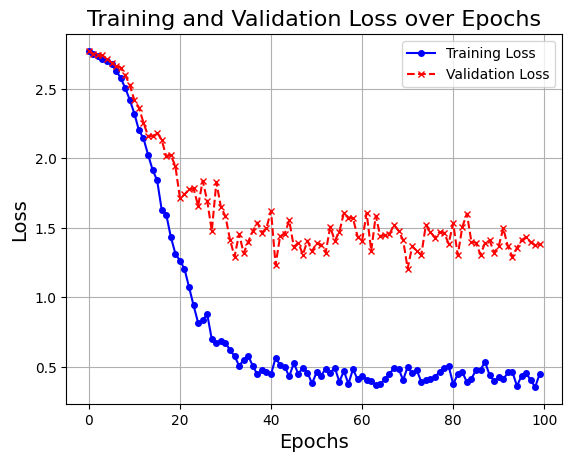

In [8]:
# Plot training and validation loss
plt.plot(train_losses, label='Training Loss', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(val_losses, label='Validation Loss', color='red', linestyle='--', marker='x', markersize=4)

# Add title and labels
plt.title('Training and Validation Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Show legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Optionally, set a range for the y-axis for clarity (if you know the expected loss range)
# plt.ylim(0, 2)  # Adjust according to your loss scale

# Show plot
plt.show()

### Explanation of Code: Image Loading, Prediction, and Visualization for Bird Classification Model

This code defines functions to load, preprocess, predict, and visualize images for a bird classification model. It also includes an example loop that randomly selects images from a test dataset and displays the model's predictions.

---

#### 1. Loading and Preprocessing an Image

- **`load_and_preprocess_image(image_path, transform)`**:
  - Loads an image from the given file path.
  - Converts the image to **RGB** format to ensure compatibility with the model.
  - Applies the specified **transformations** (e.g., resizing, normalization).
  - **Returns** the original image and a preprocessed tensor with an added batch dimension, ready for model input.

#### 2. Making Predictions on an Image

- **`predict_image(model, image_path, transform, device)`**:
  - Loads and preprocesses an image using `load_and_preprocess_image`.
  - Sets the model to **evaluation mode** to disable layers like dropout and batch normalization.
  - Disables gradient calculation (`torch.no_grad()`) to optimize memory usage and speed during inference.
  - Moves the preprocessed image tensor to the specified **device** (CPU or GPU).
  - Passes the image through the model to get **class probabilities** by applying a **softmax** function to the output.
  - **Returns** the original image and a flattened array of probabilities for each class.

#### 3. Visualizing Predictions

- **`visualize_predictions(image, probabilities, class_names, top_k=5)`**:
  - Displays the original image along with a **bar chart** of the top-k class predictions.
  - Retrieves indices of the top-k probabilities and maps them to their respective class names.
  - Creates a plot with:
    - The **original image** on the left.
    - A **horizontal bar chart** of the top-k class probabilities on the right.
  - **Uses `plt.show()`** to display the combined image and bar chart, with the highest probability class at the top of the chart.

#### 4. Selecting a Random Image from a Folder

- **`get_random_image_from_folder(folder_path)`**:
  - Selects a random image from a folder structure organized by class.
  - Lists all subfolders in the specified root folder, where each subfolder corresponds to a class.
  - Randomly selects a **class folder** and then a **random image** within that folder.
  - **Returns** the file path to the selected image and its actual class label.

#### 5. Example Usage: Predicting and Visualizing Random Images

- **`for` loop to predict and visualize 10 random images**:
  - **`test_folder_path`**: Specifies the path to the test dataset, where images are organized by class.
  - **`transform`**: Defines transformations (resizing, tensor conversion, normalization) to preprocess images.
  - **`class_names`**: Uses `full_train_dataset.classes` to get the list of class names corresponding to the model’s output.
  
- **Loop Logic**:
  - For each iteration:
    - Selects a random image from the test folder using `get_random_image_from_folder`.
    - Makes a prediction using `predict_image`, returning the original image and class probabilities.
    - Calls `visualize_predictions` to display the image and top-k predictions.
    - Prints the **actual and predicted class** for each image to provide feedback on model performance.

---

### Summary

This code provides a complete pipeline for evaluating a bird classification model:

1. **Image Loading and Preprocessing**: Ensures images are in the correct format and scaled for the model.
2. **Prediction**: Uses the model to predict class probabilities for each input image.
3. **Visualization**: Displays the original image alongside a bar chart of the top-k predictions.
4. **Random Image Selection**: Selects images randomly from a folder structure to test model performance on diverse classes.
5. **Example Usage**: Predicts and visualizes 10 random test images, printing both the actual and predicted class labels.

This setup allows for efficient and informative testing of the bird classification model, showcasing its accuracy and confidence across different classes.

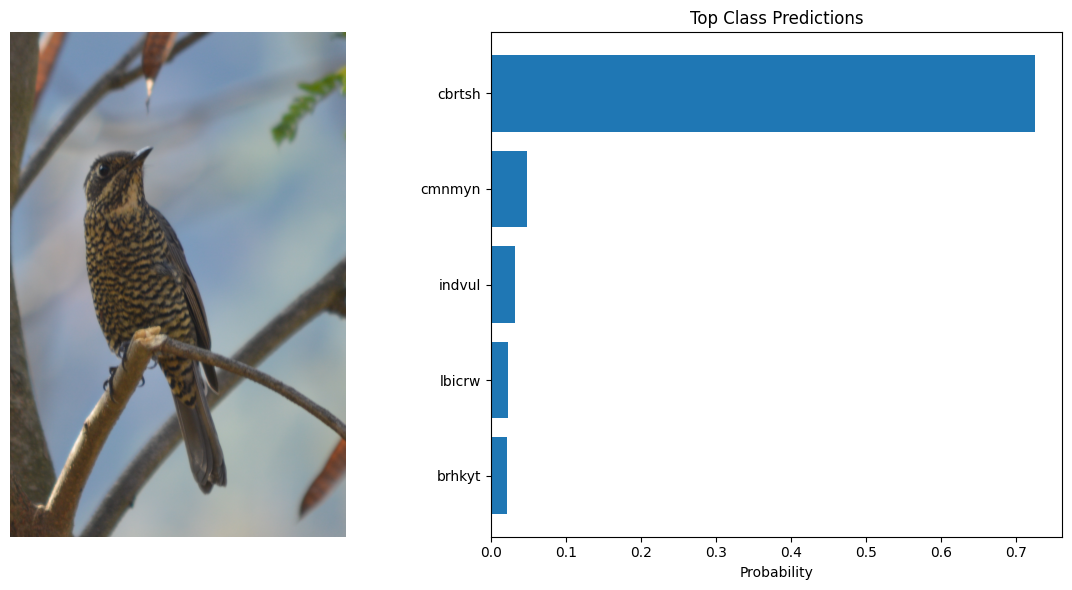

Image 1:
  Actual class: cbrtsh
  Predicted class: cbrtsh
------------------------------


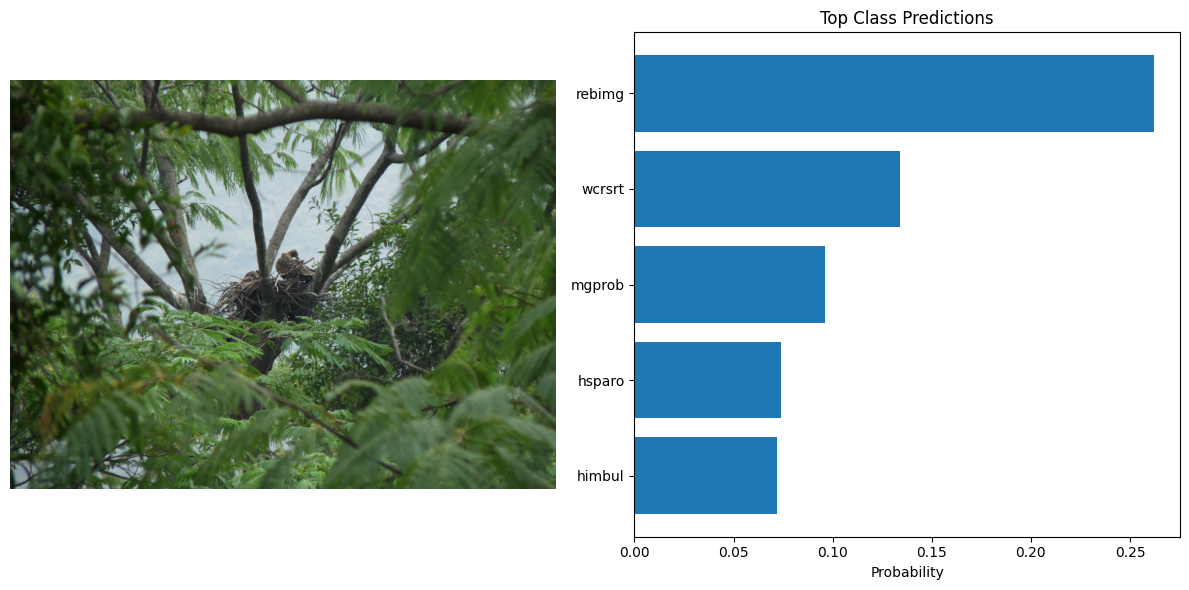

Image 2:
  Actual class: himgri
  Predicted class: rebimg
------------------------------


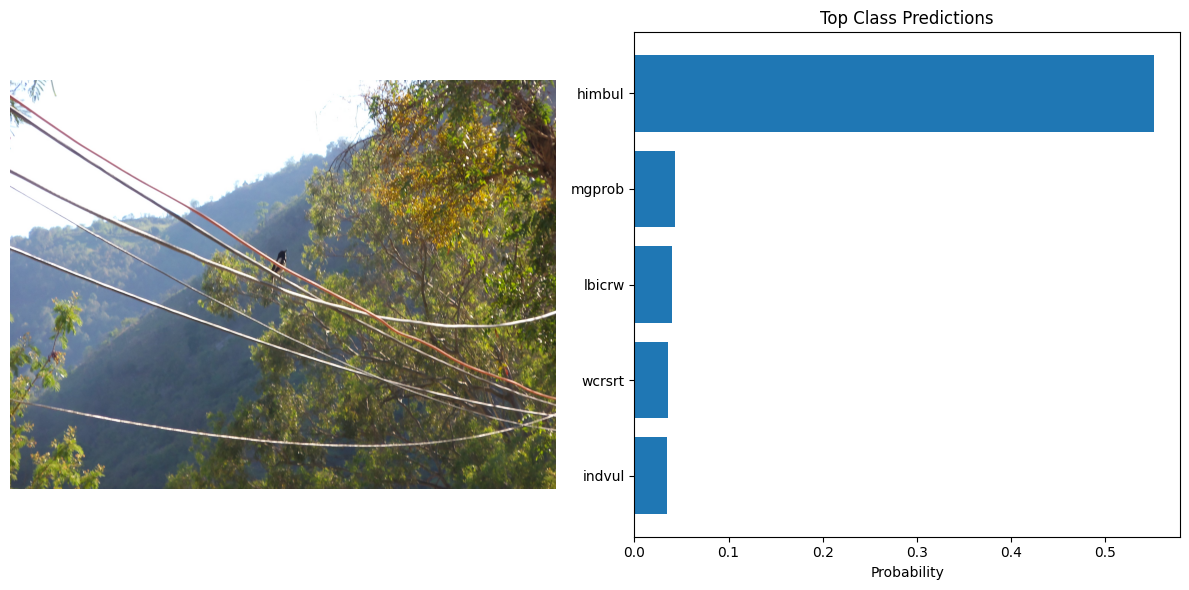

Image 3:
  Actual class: mgprob
  Predicted class: himbul
------------------------------


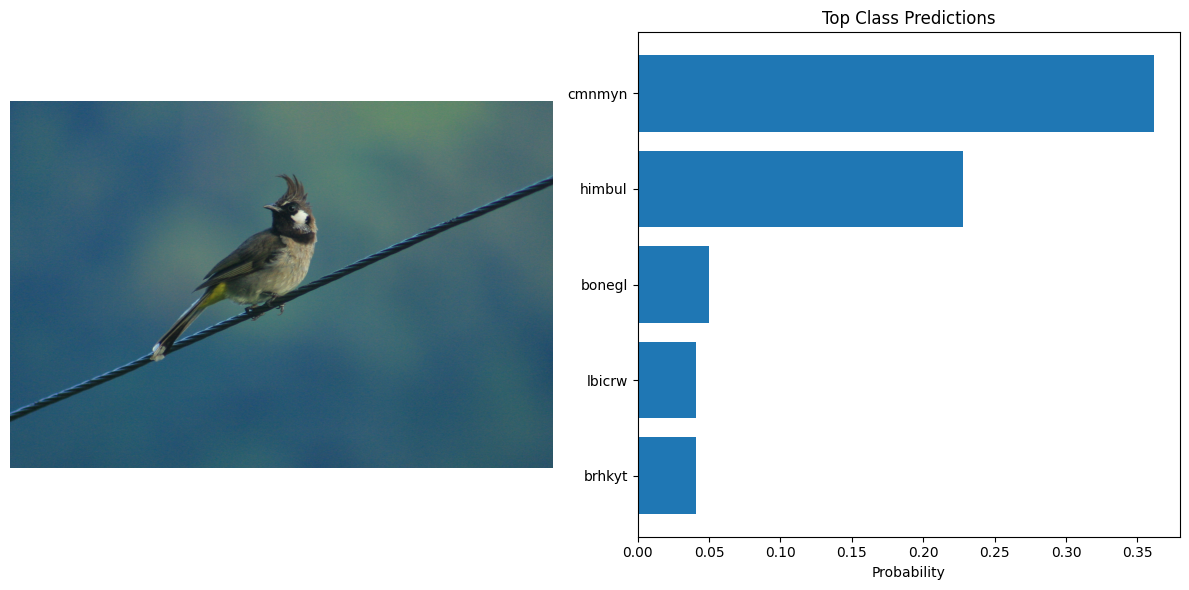

Image 4:
  Actual class: himbul
  Predicted class: cmnmyn
------------------------------


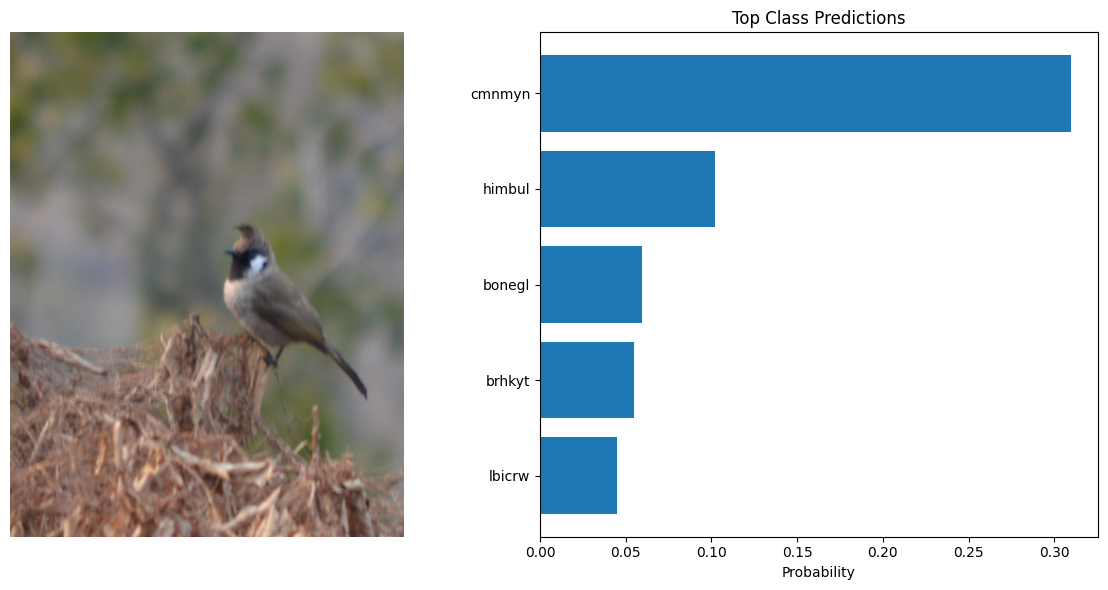

Image 5:
  Actual class: himbul
  Predicted class: cmnmyn
------------------------------


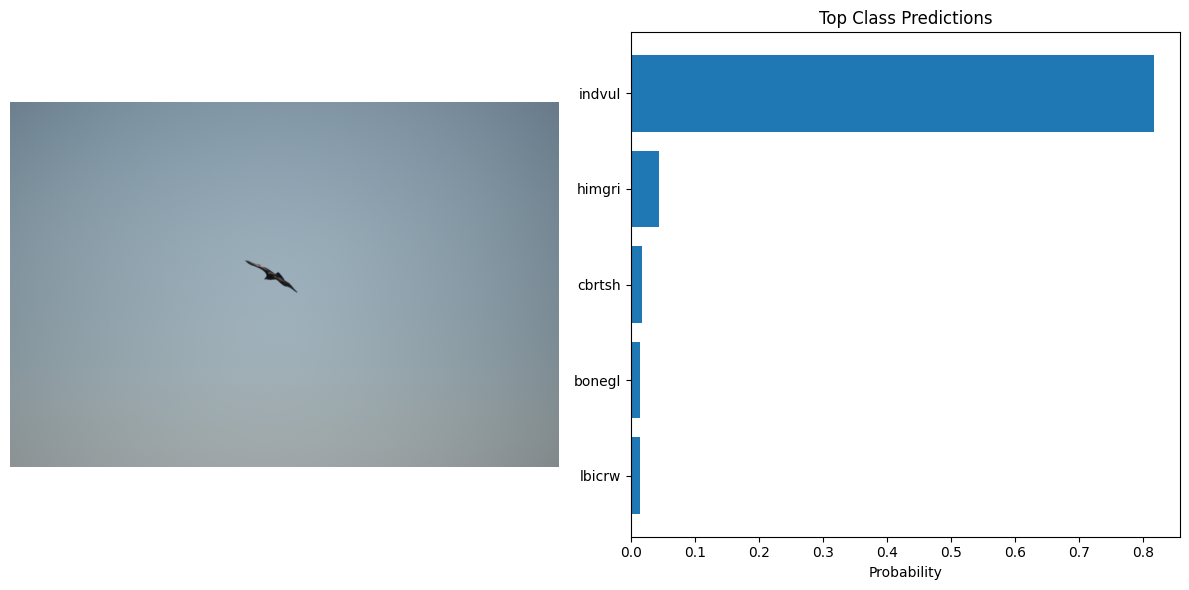

Image 6:
  Actual class: indvul
  Predicted class: indvul
------------------------------


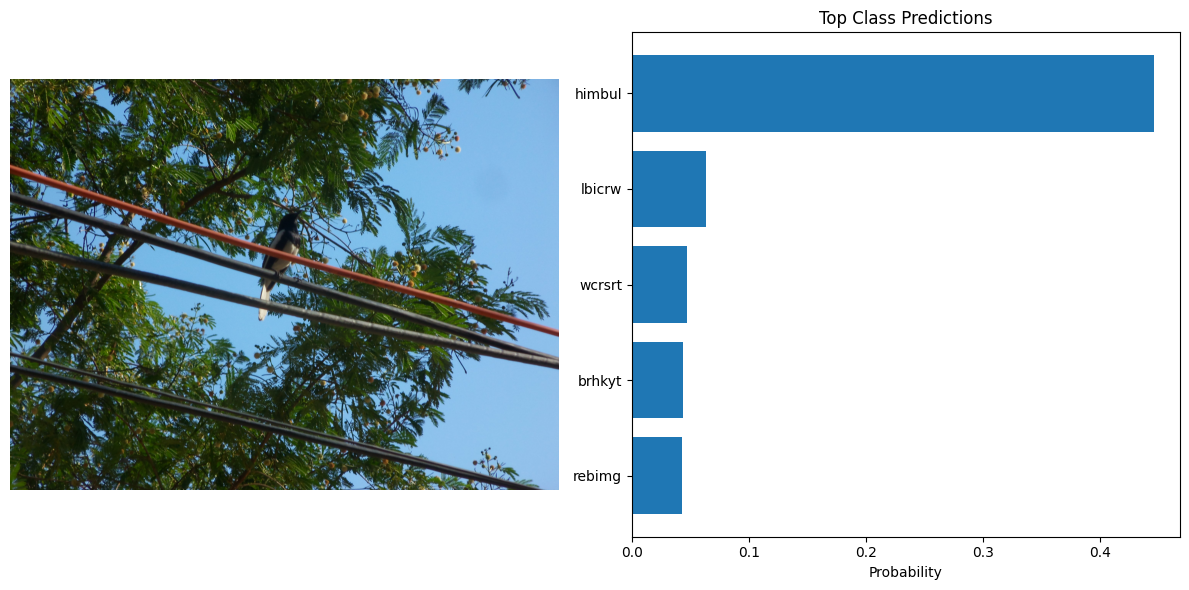

Image 7:
  Actual class: mgprob
  Predicted class: himbul
------------------------------


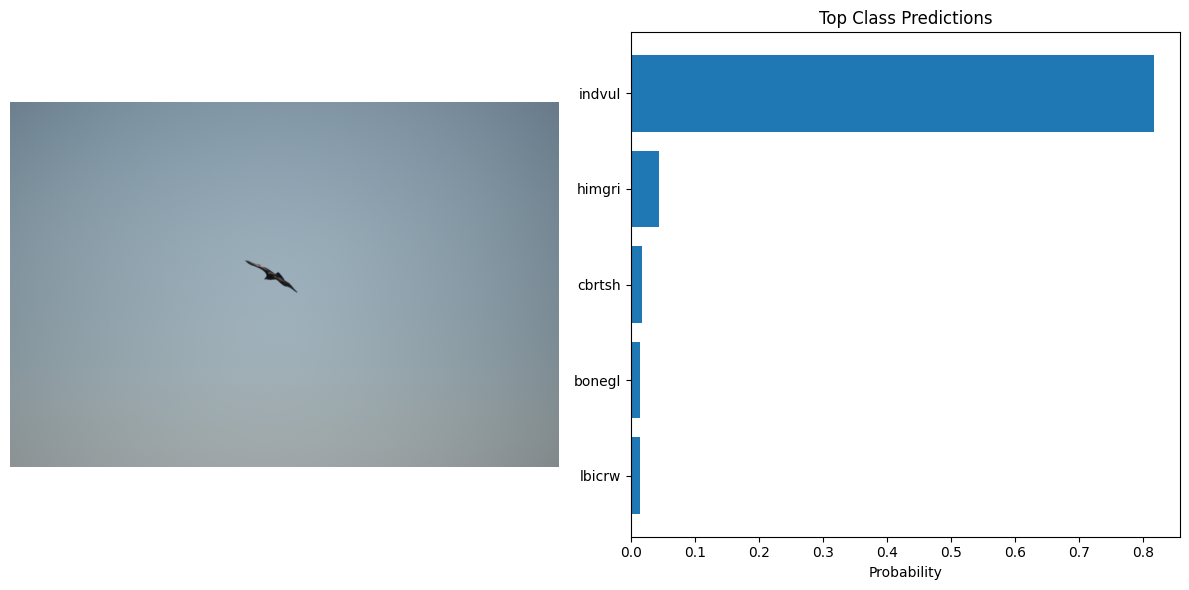

Image 8:
  Actual class: indvul
  Predicted class: indvul
------------------------------


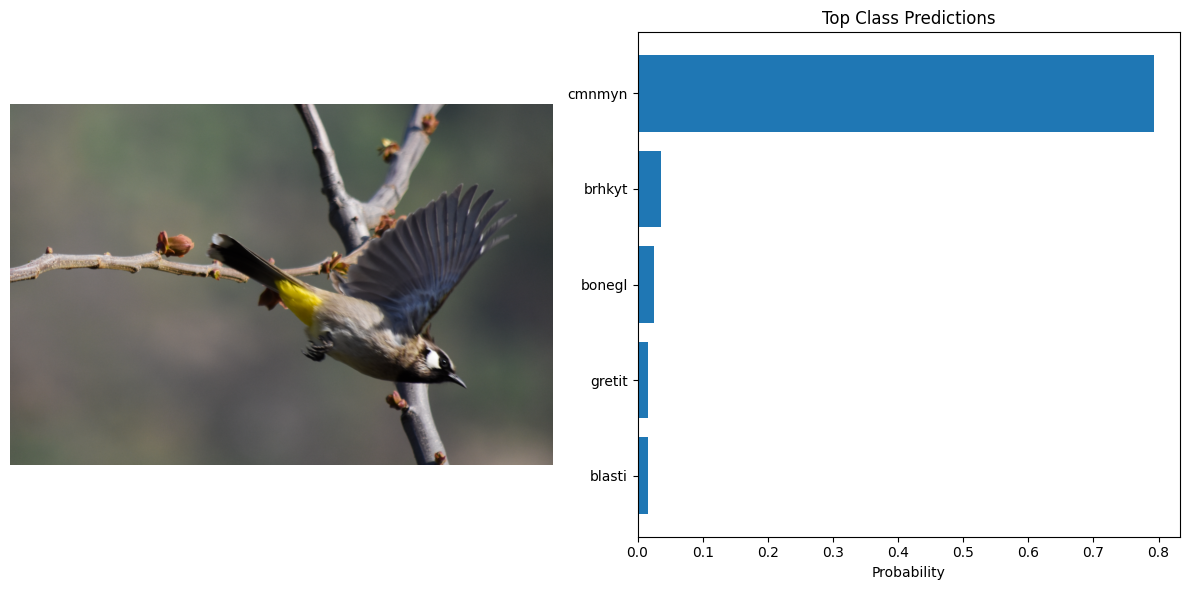

Image 9:
  Actual class: himbul
  Predicted class: cmnmyn
------------------------------


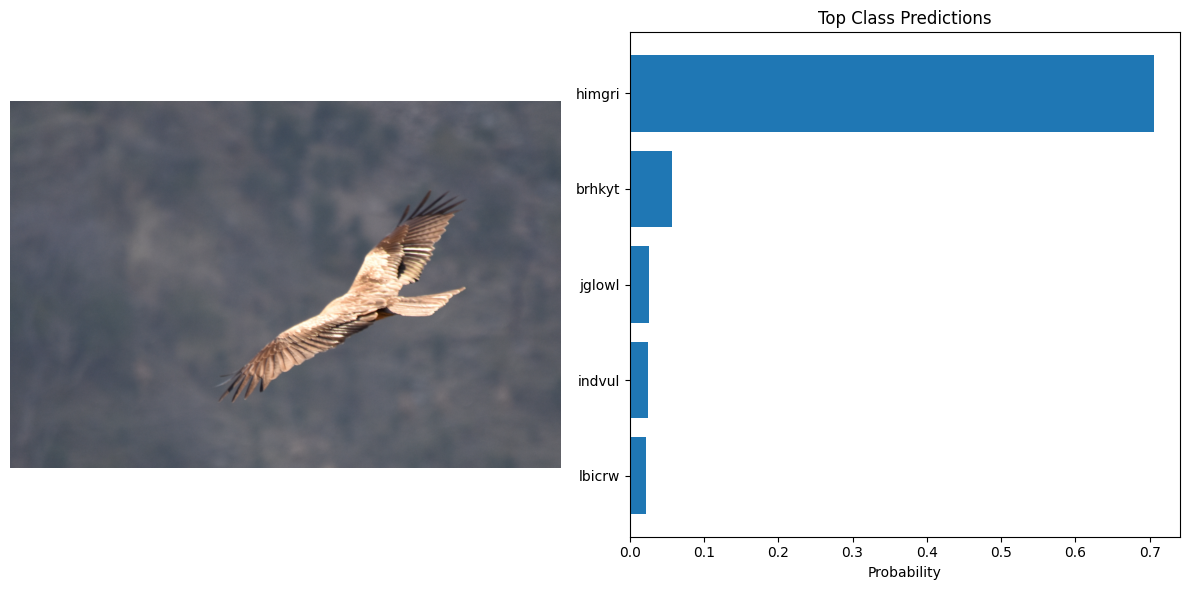

Image 10:
  Actual class: brhkyt
  Predicted class: himgri
------------------------------


In [9]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path, transform):
    """
    Loads an image from the specified path, converts it to RGB format, applies transformations, 
    and prepares it as a tensor for model input.
    
    Args:
        image_path (str): The file path of the image to load.
        transform (torchvision.transforms.Compose): Transformations to apply to the image.
        
    Returns:
        tuple: Original PIL image and preprocessed image tensor ready for model input.
    """
    image = Image.open(image_path).convert("RGB")  # Open and convert image to RGB
    return image, transform(image).unsqueeze(0)     # Apply transformations and add batch dimension


# Prediction function with combined loading, preprocessing, and prediction
def predict_image(model, image_path, transform, device):
    """
    Loads and preprocesses an image, then uses the model to predict class probabilities.
    
    Args:
        model (torch.nn.Module): Trained model to use for prediction.
        image_path (str): Path to the image file to predict.
        transform (torchvision.transforms.Compose): Transformations to apply to the image.
        device (torch.device): Device to run the model on (CPU or GPU).
        
    Returns:
        tuple: Original image and class probabilities as a numpy array.
    """
    original_image, image_tensor = load_and_preprocess_image(image_path, transform)  # Load and preprocess image
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for inference
        image_tensor = image_tensor.to(device)  # Move image tensor to specified device
        outputs = model(image_tensor)           # Get model outputs
        probabilities = F.softmax(outputs, dim=1)  # Apply softmax to get class probabilities
    
    return original_image, probabilities.cpu().numpy().flatten()  # Return image and probabilities


# Visualization function for predictions
def visualize_predictions(image, probabilities, class_names, top_k=5):
    """
    Displays the original image alongside a bar chart of the top-k class predictions.
    
    Args:
        image (PIL.Image): The original image.
        probabilities (np.array): Array of class probabilities output by the model.
        class_names (list): List of class names corresponding to model output.
        top_k (int): Number of top predictions to display (default is 5).
    """
    top_k_idx = probabilities.argsort()[-top_k:][::-1]         # Get indices of top-k predictions
    top_classes = [class_names[i] for i in top_k_idx]          # Retrieve class names for top-k predictions
    top_probabilities = probabilities[top_k_idx]               # Get probabilities for top-k predictions

    # Plotting the original image and top-k predictions
    fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
    axarr[0].imshow(image)                                     # Display the original image
    axarr[0].axis("off")
    
    axarr[1].barh(top_classes, top_probabilities)              # Display bar chart for top-k predictions
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Top Class Predictions")
    axarr[1].invert_yaxis()                                    # Display highest probability at the top
    
    plt.tight_layout()
    plt.show()


# Function to select a random image from the test folder
def get_random_image_from_folder(folder_path):
    """
    Selects a random image from a specified folder structure where images are organized by class.
    
    Args:
        folder_path (str): Path to the root folder containing subfolders for each class.
        
    Returns:
        tuple: File path to a randomly selected image and the actual class label.
    """
    classes = os.listdir(folder_path)                          # List all class subfolders in the test folder
    random_class = random.choice(classes)                      # Choose a random class
    class_folder = os.path.join(folder_path, random_class)     # Path to chosen class folder
    image_files = os.listdir(class_folder)                     # List all images in the chosen class folder
    random_image_file = random.choice(image_files)             # Choose a random image from the class folder
    return os.path.join(class_folder, random_image_file), random_class  # Return image path and class


# Example usage to predict and visualize 10 random images
test_folder_path = "/kaggle/input/bird-species-classification/test_data/test_data"  # Replace with your test data path
transform = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize images to match model input size
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize as per ImageNet standards
])

class_names = full_train_dataset.classes  # Assuming full_train_dataset.classes provides the class names

# Loop to predict on 10 random images and visualize results
for i in range(10):  
    test_image_path, actual_class = get_random_image_from_folder(test_folder_path)  # Select random image
    original_image, probabilities = predict_image(model, test_image_path, transform, device)  # Make prediction
    visualize_predictions(original_image, probabilities, class_names)  # Visualize top predictions
    
    # Print actual and predicted class
    predicted_class_idx = probabilities.argmax()
    predicted_class = class_names[predicted_class_idx]
    print(f"Image {i+1}:")
    print(f"  Actual class: {actual_class}")
    print(f"  Predicted class: {predicted_class}")
    print("-" * 30)

### Explanation of Code: Model Evaluation on Test Data

This code defines a function, `evaluate_model`, to evaluate a trained model on a test dataset. It calculates and prints the model’s accuracy on the test data, using a **progress bar** to display evaluation progress.

---

#### 1. Setting the Model to Evaluation Mode

- **`model.eval()`**:
  - Puts the model in evaluation mode. This disables certain layers like dropout and batch normalization, which behave differently during training and evaluation, ensuring consistent and accurate predictions.

#### 2. Initializing Counters

- **`correct = 0`** and **`total = 0`**:
  - These counters keep track of the total number of correct predictions and the total number of samples in the test dataset, which are used to calculate accuracy.

#### 3. Evaluating the Model with No Gradient Computation

- **`with torch.no_grad():`**:
  - Disables gradient computation, which reduces memory usage and speeds up computation. Since gradients are not needed during evaluation, this ensures a more efficient evaluation process.

#### 4. Looping Through the Test Data

- **Loop over `test_loader`**:
  - Iterates over each batch of images and labels in `test_loader`, which holds the test dataset.

- **Progress Bar**:
  - **`tqdm(test_loader, desc="Evaluating", leave=False)`** wraps the test loader in a `tqdm` progress bar with the description “Evaluating.” This displays the evaluation progress and makes it easier to monitor large datasets.

#### 5. Moving Data to the Correct Device

- **`images, labels = images.to(device), labels.to(device)`**:
  - Moves the images and labels to the specified device (`device`), which is typically either a GPU or CPU, ensuring compatibility with the model's device.

#### 6. Making Predictions

- **`outputs = model(images)`**:
  - Passes the images through the model to get predictions.

- **`_, predicted = torch.max(outputs, 1)`**:
  - Extracts the predicted class for each image in the batch. The `torch.max` function selects the index of the highest probability from the output, which corresponds to the predicted class label.

#### 7. Calculating Correct Predictions

- **`total += labels.size(0)`**:
  - Increments the `total` counter by the batch size, counting all samples processed so far.

- **`correct += (predicted == labels).sum().item()`**:
  - Compares predicted labels with actual labels to check which predictions are correct, then increments the `correct` counter by the number of correct predictions in the batch.

#### 8. Calculating and Printing Test Accuracy

- **`test_accuracy = 100 * correct / total`**:
  - Calculates the accuracy of the model on the test set by dividing the number of correct predictions by the total number of samples and multiplying by 100 to get a percentage.

- **`print(f'Test Accuracy: {test_accuracy:.2f}%')`**:
  - Prints the calculated test accuracy to two decimal places, displaying the model's overall performance on the test data.

---

### Summary

- The **`evaluate_model`** function calculates and prints the model's accuracy on a test dataset.
- **Disabling gradients** and setting the model to **evaluation mode** ensures efficiency and accurate evaluation.
- A **progress bar** (via `tqdm`) is used to monitor progress, especially helpful for large datasets.
- The function outputs the **final test accuracy** as a percentage, providing a clear measure of model performance on unseen data.

This setup allows for efficient and informative evaluation of a trained model, providing insight into its generalization capability on test data.

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    # Wrap test_loader in tqdm to display progress
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels)

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

# Evaluate the model on the test set
evaluate_model(model, test_loader)